In [1]:
import numpy as np

from src.tensor import Tensor
from src.activation_function import Linear, ReLU, Sigmoid, Softmax
from src.loss_function import MeanSquaredError
from src.layer import Dense
from src.model import FFNN
from src.weight_initializer import GlorotUniformInitializer

### **Tensor Test Case**

In [2]:
# Basic operations
a = Tensor(np.array([1,2]))
b = Tensor(np.array([3,4]))
c = a + b
d = a - b
e = a * b
f = a / b

print(a)
print(b)
print(c)
print(d)
print(e)
print(f)

Value: [1. 2.], Gradient: [0. 0.], Op: None
Value: [3. 4.], Gradient: [0. 0.], Op: None
Value: [4. 6.], Gradient: [0. 0.], Op: +
Value: [-2. -2.], Gradient: [0. 0.], Op: +
Value: [3. 8.], Gradient: [0. 0.], Op: *
Value: [0.33333333 0.5       ], Gradient: [0. 0.], Op: *


In [3]:
# Activation function and loss function
a = Tensor(np.array([1,2]))
b = a.compute_activation(Linear)
c = a.compute_activation(ReLU)
d = b.compute_loss(Tensor(np.array([3,4])), MeanSquaredError)
e = c.compute_loss(Tensor(np.array([3,4])), MeanSquaredError)

print(a)
print(b)
print(c)
print(d)
print(e)

Value: [1. 2.], Gradient: [0. 0.], Op: None
Value: [1. 2.], Gradient: [0. 0.], Op: Linear
Value: [1. 2.], Gradient: [0. 0.], Op: ReLU
Value: [4.], Gradient: [0.], Op: MeanSquaredError
Value: [4.], Gradient: [0.], Op: MeanSquaredError


In [4]:
# Automatic differentiation
a = Tensor(np.array([1,2]))
b = Tensor(np.array([3,4]))
c = a + b
d = a - b
e = c * d
f = e.compute_activation(Linear)
g = e.compute_activation(ReLU)
h = f.compute_loss(np.array([1,1]), MeanSquaredError)
i = g.compute_loss(np.array([1,1]), MeanSquaredError)

print("---------- Before backpropagation ----------")
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)
print(h)
print(i)

h.backward()
i.backward()

print("\n---------- After backpropagation ----------")
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)
print(h)
print(i)

---------- Before backpropagation ----------
Value: [1. 2.], Gradient: [0. 0.], Op: None
Value: [3. 4.], Gradient: [0. 0.], Op: None
Value: [4. 6.], Gradient: [0. 0.], Op: +
Value: [-2. -2.], Gradient: [0. 0.], Op: +
Value: [ -8. -12.], Gradient: [0. 0.], Op: *
Value: [ -8. -12.], Gradient: [0. 0.], Op: Linear
Value: [0. 0.], Gradient: [0. 0.], Op: ReLU
Value: [125.], Gradient: [0.], Op: MeanSquaredError
Value: [1.], Gradient: [0.], Op: MeanSquaredError

---------- After backpropagation ----------
Value: [1. 2.], Gradient: [-108. -312.], Op: None
Value: [3. 4.], Gradient: [108. 156.], Op: None
Value: [4. 6.], Gradient: [ 72. 104.], Op: +
Value: [-2. -2.], Gradient: [-144. -312.], Op: +
Value: [ -8. -12.], Gradient: [-18. -26.], Op: *
Value: [ -8. -12.], Gradient: [-18. -26.], Op: Linear
Value: [0. 0.], Gradient: [-2. -2.], Op: ReLU
Value: [125.], Gradient: [1.], Op: MeanSquaredError
Value: [1.], Gradient: [1.], Op: MeanSquaredError


In [5]:
## Simulation of one layer with two neurons (h1 and h2)

# Initial values
x = Tensor(np.array([1, 2, 3]), tensor_type="input")            # input, x[0] is always 1
y = np.array([16, 14])                                          # correct class / y_true
wh1 = Tensor(np.array([2, 3, 4]), tensor_type="weight")         # weights of neuron h1, wh1[0] = b1 (bias)
wh2 = Tensor(np.array([3, 4, 5]), tensor_type="weight")         # weights of neuron h2, wh2[0] = b2 (bias)

# Calculate net
wh1_x = wh1 * x
wh2_x = wh2 * x
net1 = wh1_x.sum()
net2 = wh2_x.sum()

# Calculate output
o1 = net1.compute_activation(ReLU)
o2 = net2.compute_activation(ReLU)

# Calculate loss
output = o1.concat([o2])
loss = output.compute_loss(y, MeanSquaredError)

print("---------- Before backpropagation ----------")
print(wh1)
print(wh2)
print(wh1_x)
print(wh2_x)
print(net1)
print(net2)
print(o1)
print(o2)
print(output)
print(loss)

# Initiate automated differentiation
loss.backward()

print("\n---------- After backpropagation ----------")
print(wh1)
print(wh2)
print(wh1_x)
print(wh2_x)
print(net1)
print(net2)
print(o1)
print(o2)
print(output)
print(loss)


---------- Before backpropagation ----------
Value: [2. 3. 4.], Gradient: [0. 0. 0.], Op: None, Type: weight
Value: [3. 4. 5.], Gradient: [0. 0. 0.], Op: None, Type: weight
Value: [ 2.  6. 12.], Gradient: [0. 0. 0.], Op: *
Value: [ 3.  8. 15.], Gradient: [0. 0. 0.], Op: *
Value: [20.], Gradient: [0.], Op: sum
Value: [26.], Gradient: [0.], Op: sum
Value: [20.], Gradient: [0.], Op: ReLU
Value: [26.], Gradient: [0.], Op: ReLU
Value: [20. 26.], Gradient: [0. 0.], Op: concat
Value: [80.], Gradient: [0.], Op: MeanSquaredError

---------- After backpropagation ----------
Value: [2. 3. 4.], Gradient: [ 8. 16. 24.], Op: None, Type: weight
Value: [3. 4. 5.], Gradient: [24. 48. 72.], Op: None, Type: weight
Value: [ 2.  6. 12.], Gradient: [8. 8. 8.], Op: *
Value: [ 3.  8. 15.], Gradient: [24. 24. 24.], Op: *
Value: [20.], Gradient: [8.], Op: sum
Value: [26.], Gradient: [24.], Op: sum
Value: [20.], Gradient: [8.], Op: ReLU
Value: [26.], Gradient: [24.], Op: ReLU
Value: [20. 26.], Gradient: [ 8. 24.

In [6]:
## Simulation of 3-layered (excluding input layer) network with n = [3, 5, 4] number of neurons

# Initial values
x = Tensor(np.array([1, 2, 3]), tensor_type="input")            
y = np.array([50, 64, 62, 55])                                          
wh1 = Tensor(np.array([2, 3, 4]), tensor_type="weight")
wh2 = Tensor(np.array([3, 4, 5]), tensor_type="weight")
wh3 = Tensor(np.array([4, 5, 6]), tensor_type="weight")
wh4 = Tensor(np.array([2, 3, 4, 5]), tensor_type="weight")
wh5 = Tensor(np.array([3, 4, 5, 6]), tensor_type="weight")
wh6 = Tensor(np.array([4, 5, 6, 7]), tensor_type="weight")
wh7 = Tensor(np.array([5, 6, 7, 8]), tensor_type="weight")
wh8 = Tensor(np.array([6, 7, 8, 9]), tensor_type="weight")
wh9 = Tensor(np.array([2, 3, 4, 5, 6, 7]), tensor_type="weight")
wh10 = Tensor(np.array([3, 4, 5, 6, 7, 8]), tensor_type="weight")
wh11 = Tensor(np.array([4, 5, 6, 7, 8, 9]), tensor_type="weight")
wh12 = Tensor(np.array([5, 6, 7, 8, 9, 10]), tensor_type="weight")


# Layer 1
wh1_x = wh1 * x
wh2_x = wh2 * x
wh3_x = wh3 * x
net1 = wh1_x.sum()
net2 = wh2_x.sum()
net3 = wh3_x.sum()
o1 = net1.compute_activation(ReLU)
o2 = net2.compute_activation(ReLU)
o3 = net3.compute_activation(ReLU)
output_l1 = o1.concat([o2, o3])

# Layer 2
input_l2 = output_l1.add_x0()
wh4_l2 = wh4 * input_l2
wh5_l2 = wh5 * input_l2
wh6_l2 = wh6 * input_l2
wh7_l2 = wh7 * input_l2
wh8_l2 = wh8 * input_l2
net4 = wh4_l2.sum()
net5 = wh5_l2.sum()
net6 = wh6_l2.sum()
net7 = wh7_l2.sum()
net8 = wh8_l2.sum()
o4 = net4.compute_activation(ReLU)
o5 = net5.compute_activation(ReLU)
o6 = net6.compute_activation(ReLU)
o7 = net7.compute_activation(ReLU)
o8 = net8.compute_activation(ReLU)
output_l2 = o4.concat([o5, o6, o7, o8])

# Layer 3
input_l3 = output_l2.add_x0()
wh9_l3 = wh9 * input_l3
wh10_l3 = wh10 * input_l3
wh11_l3 = wh11 * input_l3
wh12_l3 = wh12 * input_l3
net9 = wh9_l3.sum()
net10 = wh10_l3.sum()
net11 = wh11_l3.sum()
net12 = wh12_l3.sum()
o9 = net9.compute_activation(ReLU)
o10 = net10.compute_activation(ReLU)
o11 = net11.compute_activation(ReLU)
o12 = net12.compute_activation(ReLU)
output_l3 = o9.concat([o10, o11, o12])
loss = output_l3.compute_loss(y, MeanSquaredError)


# Backpropagation
loss.backward()

print("============ Layer 1 ============")
print(wh1_x)
print(wh2_x)
print(wh3_x)
print(net1)
print(net2)
print(net3)
print(o1)
print(o2)
print(o3)
print(output_l1)
print("\n============ Layer 2 ============")
print(input_l2)
print(wh4_l2)
print(wh5_l2)
print(wh6_l2)
print(wh7_l2)
print(wh8_l2)
print(net4)
print(net5)
print(net6)
print(net7)
print(net8)
print(o4)
print(o5)
print(o6)
print(o7)
print(o8)
print(output_l2)
print("\n============ Layer 3 ============")
print(input_l3)
print(wh9_l3)
print(wh10_l3)
print(wh11_l3)
print(wh12_l3)
print(net9)
print(net10)
print(net11)
print(net12)
print(o9)
print(o10)
print(o11)
print(o12)
print(output_l3)
print(loss)

============ Layer 1 ============
Value: [ 2.  6. 12.], Gradient: [16291060. 16291060. 16291060.], Op: *
Value: [ 3.  8. 15.], Gradient: [20034510. 20034510. 20034510.], Op: *
Value: [ 4. 10. 18.], Gradient: [23777960. 23777960. 23777960.], Op: *
Value: [20.], Gradient: [16291060.], Op: sum
Value: [26.], Gradient: [20034510.], Op: sum
Value: [32.], Gradient: [23777960.], Op: sum
Value: [20.], Gradient: [16291060.], Op: ReLU
Value: [26.], Gradient: [20034510.], Op: ReLU
Value: [32.], Gradient: [23777960.], Op: ReLU
Value: [ 1. 20. 26. 32.], Gradient: [16291060. 20034510. 23777960. 27521410.], Op: concat

============ Layer 2 ============
Value: [ 1. 20. 26. 32.], Gradient: [16291060. 20034510. 23777960. 27521410.], Op: concat
Value: [  2.  60. 104. 160.], Gradient: [485238. 485238. 485238. 485238.], Op: *
Value: [  3.  80. 130. 192.], Gradient: [616964. 616964. 616964. 616964.], Op: *
Value: [  4. 100. 156. 224.], Gradient: [748690. 748690. 748690. 748690.], Op: *
Value: [  5. 120. 182.

### **Layer Test Case**

In [7]:
## Simulation of one-layered network with n = 5 number of neurons

x = Tensor(np.array([1, 2, 3, 4]))      # input, x[0] is always 1
y = np.array([5, 0, 3, 1, 2])           # correct class / y_true

layer = Dense(neuron_size=5, activation="linear", kernel_initializer="glorot_uniform", input_size=3) # output layer with 5 neurons

# Forwardpropagation
y_pred = layer.forward(x)
loss = y_pred.compute_loss(y, MeanSquaredError)
print("y_pred:", y_pred)
print("Loss:", loss)

print("\n---------- Before backpropagation ----------")
print('Weights:', layer.weights)

# Backpropagation
loss.backward()
print("\n---------- After backpropagation ----------")
print("Weights:", layer.weights)

y_pred: Value: [ 0.75816725 -1.60283345 -3.00598617 -1.95092975  0.89318426], Gradient: [0. 0. 0. 0. 0.], Op: concat
Loss: Value: [13.31342349], Gradient: [0.], Op: MeanSquaredError

---------- Before backpropagation ----------
Weights: [Value: [-0.71805616  0.57785234 -0.29570479  0.30190828], Gradient: [0. 0. 0. 0.], Op: None, Type: weight, Value: [ 0.15947737 -0.62144865  0.21405096 -0.29039161], Gradient: [0. 0. 0. 0.], Op: None, Type: weight, Value: [ 0.42886642 -0.75593266 -0.14194645 -0.37428698], Gradient: [0. 0. 0. 0.], Op: None, Type: weight, Value: [-0.55636167  0.6320574  -0.41832305 -0.35092843], Gradient: [0. 0. 0. 0.], Op: None, Type: weight, Value: [ 0.670407   -0.65890345  0.26299198  0.18790206], Gradient: [0. 0. 0. 0.], Op: None, Type: weight]

---------- After backpropagation ----------
Weights: [Value: [-0.71805616  0.57785234 -0.29570479  0.30190828], Gradient: [ -8.48366549 -16.96733098 -25.45099647 -33.93466196], Op: None, Type: weight, Value: [ 0.15947737 -0.62

### **FFNN Test Case**

In [6]:
## Simulation of one-layered network with n = 5 number of neurons

x = Tensor(np.array([2, 3, 4]))      
y = np.array([5, 0, 3, 1, 2])           

# Build the FFNN model
model = FFNN([
    Dense(neuron_size=5, activation="linear", kernel_initializer="glorot_uniform", input_size=3)
])

# Compile the model
model.compile(optimizer="sgd", loss="mean_squared_error")

# Predict output (without fitting)
y_pred = model.forward(x)
print("y_pred:", y_pred)
print("\n---------- Before backpropagation ----------")
for layer in model.layers:
    print(layer.weights)

# Initiate backwardpropagation
model.backward(y)
print("\n---------- After backpropagation ----------")
for layer in model.layers:
    print(layer.weights)
    print("gradient:", layer.gradients)
    print()

y_pred: [0.75625358 0.88290469 1.17316034 0.77017699 5.63194234]

---------- Before backpropagation ----------
[Value: [-0.14765154 -0.80996399  0.31149464  0.39733729], Gradient: [0. 0. 0. 0.], Op: None, Type: weight, Value: [-0.61476725  0.54320327 -0.26536646  0.3018412 ], Gradient: [0. 0. 0. 0.], Op: None, Type: weight, Value: [ 0.64372667 -0.40176092 -0.13081464  0.43134986], Gradient: [0. 0. 0. 0.], Op: None, Type: weight, Value: [ 0.58877791 -0.30842517  0.66620833 -0.30009389], Gradient: [0. 0. 0. 0.], Op: None, Type: weight, Value: [0.35351755 0.62742678 0.52514516 0.61203394], Gradient: [0. 0. 0. 0.], Op: None, Type: weight]

---------- After backpropagation ----------
[Value: [-0.14765154 -0.80996399  0.31149464  0.39733729], Gradient: [ -8.48749284 -16.97498567 -25.46247851 -33.94997134], Op: None, Type: weight, Value: [-0.61476725  0.54320327 -0.26536646  0.3018412 ], Gradient: [1.76580937 3.53161875 5.29742812 7.06323749], Op: None, Type: weight, Value: [ 0.64372667 -0.40

In [7]:
def generate_linearly_separable_data(num_samples, num_features=2, weight=None, bias=1, random_seed=None):
    if num_features < 2:
        raise ValueError("num_features must be at least 2 for meaningful separation.")
    
    if random_seed is not None:
        np.random.seed(random_seed)

    X = np.random.rand(num_samples, num_features) * 20

    if weight is None:
        weight = np.random.uniform(-5, 5, size=(num_features - 1))

    decision_boundary = np.dot(X[:, :-1], weight) + X[:, -1]
    y = np.array(decision_boundary > (bias + 10), dtype=int).reshape(-1, 1)

    return X, y


In [11]:
## Simulation of three-layered network with n = [5, 7, 1] number of neurons, with fiting phase
from sklearn.model_selection import train_test_split

# Generate dataset
X, y = generate_linearly_separable_data(num_samples=40, num_features=4)

# Split dataset into train set and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train)

# Build the FFNN model
model = FFNN([
    Dense(neuron_size=5, activation="sigmoid", kernel_initializer="glorot_uniform", input_size=4),
    Dense(neuron_size=7, activation="sigmoid", kernel_initializer="glorot_uniform"),
    Dense(neuron_size=1, activation="sigmoid", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="mean_squared_error")

history = model.fit(X_train, y_train, epochs=50, batch_size=20, validation_data=(X_val, y_val))

y_pred = model.predict(X_test)
print(y_pred)

[array([0.19531127]), array([0.19696189]), array([0.20085011]), array([0.19306435]), array([0.19693515]), array([0.19691004]), array([0.17070453]), array([0.19701254])]


In [12]:
print(history)

[(np.float64(0.19934144832441025), np.float64(0.21089144486390093)), (np.float64(0.19195671795336497), np.float64(0.20674109761376863)), (np.float64(0.185785894951738), np.float64(0.2034030501139053)), (np.float64(0.18061545417720648), np.float64(0.2007195861816079)), (np.float64(0.17626828010116902), np.float64(0.19856323845136978)), (np.float64(0.17259898273294727), np.float64(0.19683162382546845)), (np.float64(0.16948891688343834), np.float64(0.19544276145180758)), (np.float64(0.16684152392532586), np.float64(0.19433106614380297)), (np.float64(0.16457825534095857), np.float64(0.19344403549874833)), (np.float64(0.162635140363183), np.float64(0.19273956797466657)), (np.float64(0.16095996296358045), np.float64(0.19218381990604386)), (np.float64(0.15950997317678192), np.float64(0.19174950639192734)), (np.float64(0.1582500474535101), np.float64(0.19141455973953306)), (np.float64(0.15715121684947148), np.float64(0.19116107202760865)), (np.float64(0.15618949186739672), np.float64(0.1909744

In [9]:
## Check gradients for each layer
model.forward(Tensor(X_train[0]))
model.backward(y_train[0])

i = 1
for layer in model.layers:
    print(f"layer-{i} gradients:", layer.gradients)
    i += 1

layer-1 gradients: [Value: [9.55858182], Gradient: [-4.85508229e-08], Op: sum, Value: [-9.1409373], Gradient: [-3.65046164e-07], Op: sum, Value: [16.72949566], Gradient: [3.75003111e-12], Op: sum, Value: [-2.75609272], Gradient: [-7.16738159e-06], Op: sum, Value: [3.63188182], Gradient: [-7.76477173e-05], Op: sum]
layer-2 gradients: [Value: [1.1062417], Gradient: [-0.00100395], Op: sum, Value: [1.40018014], Gradient: [-0.00128197], Op: sum, Value: [0.02699995], Gradient: [-0.00394307], Op: sum, Value: [-0.82484004], Gradient: [-0.00104935], Op: sum, Value: [1.42656451], Gradient: [-0.00147263], Op: sum, Value: [0.39857406], Gradient: [-0.00064638], Op: sum, Value: [-1.55439498], Gradient: [8.98635805e-05], Op: sum]
layer-3 gradients: [Value: [-2.39179847], Gradient: [0.01286799], Op: sum]


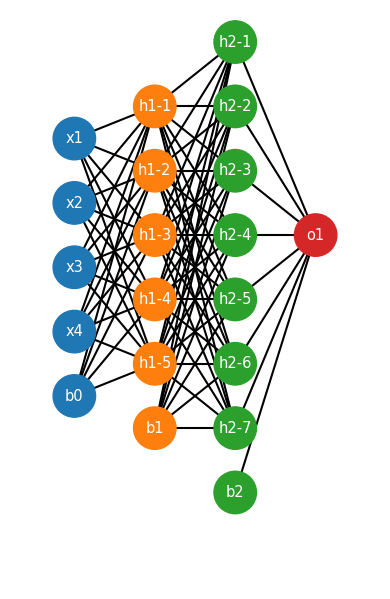

Weights (W[n][m] indicates weight value from node n to node m):

W[b0][h1-1] = -0.6503524759547937
W[x1][h1-1] = -0.40755558635932
W[x2][h1-1] = -0.6789557350535638
W[x3][h1-1] = -0.5255801738322846
W[x4][h1-1] = 0.3989624058065294

W[b0][h1-2] = -0.032096385544034836
W[x1][h1-2] = -0.4552623159440851
W[x2][h1-2] = 0.13795081212122143
W[x3][h1-2] = -0.5549221642586962
W[x4][h1-2] = 0.634357219865087

W[b0][h1-3] = 0.42225108502676234
W[x1][h1-3] = -0.06769378478650842
W[x2][h1-3] = -0.7010012650836689
W[x3][h1-3] = 0.4601173841818644
W[x4][h1-3] = -0.3569595683277306

W[b0][h1-4] = -0.3494944837683734
W[x1][h1-4] = -0.6556003668784259
W[x2][h1-4] = 0.34206684048287994
W[x3][h1-4] = -0.30404527507674933
W[x4][h1-4] = -0.19917641171837838

W[b0][h1-5] = -0.17125291630215847
W[x1][h1-5] = 0.6577438605150849
W[x2][h1-5] = 0.2752534245618967
W[x3][h1-5] = 0.1178058406706774
W[x4][h1-5] = 0.076101400886538


W[b1][h2-1] = 0.11484860847408157
W[h1-1][h2-1] = 0.530470253601793
W[h1-2][h2-1] = 

In [12]:
# Visualize the model
print(model)

In [10]:
# Print training history
model.print_history()

Epoch 1 
Training Loss: 0.1261
Validation Loss: 0.1058
------------------------
Epoch 2 
Training Loss: 0.1021
Validation Loss: 0.0870
------------------------
Epoch 3 
Training Loss: 0.0844
Validation Loss: 0.0730
------------------------
Epoch 4 
Training Loss: 0.0710
Validation Loss: 0.0622
------------------------
Epoch 5 
Training Loss: 0.0608
Validation Loss: 0.0538
------------------------
Epoch 6 
Training Loss: 0.0528
Validation Loss: 0.0472
------------------------
Epoch 7 
Training Loss: 0.0464
Validation Loss: 0.0418
------------------------
Epoch 8 
Training Loss: 0.0412
Validation Loss: 0.0374
------------------------
Epoch 9 
Training Loss: 0.0369
Validation Loss: 0.0338
------------------------
Epoch 10 
Training Loss: 0.0334
Validation Loss: 0.0307
------------------------
Epoch 11 
Training Loss: 0.0304
Validation Loss: 0.0281
------------------------
Epoch 12 
Training Loss: 0.0279
Validation Loss: 0.0258
------------------------
Epoch 13 
Training Loss: 0.0257
Valid

In [14]:
# Save the model
model.save("tes.json")

Saving file to: tes.json
Model successfully saved to tes.json!


In [15]:
# Make a new model, and load the model from before
newModel = FFNN([Dense(1, input_size=1)])

newModel.load("tes.json")

Loading model from: tes.json
Model successfully loaded from tes.json!


In [16]:
# Predict X_test using the new model
y_pred_new = newModel.predict(X_test)

# Check if new model's prediction is the same as the old model
if np.array_equal(y_pred, y_pred_new):
    print("Predictions are exactly the same!")
else:
    print("Predictions are different.")

Predictions are exactly the same!


In [17]:
# Using RMSNorm for normalization
model = FFNN([
    Dense(neuron_size=5, activation="sigmoid", kernel_initializer="glorot_uniform", input_size=4),
    Dense(neuron_size=7, activation="sigmoid", kernel_initializer="glorot_uniform"),
    Dense(neuron_size=1, activation="sigmoid", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="mean_squared_error", normalize=True)

model.fit(X_train, y_train, epochs=50, batch_size=20, validation_data=(X_val, y_val))

y_pred = model.predict(X_test)
print(y_pred)

[array([0.07557809]), array([0.04729719]), array([0.08815225]), array([0.04737172]), array([0.0470664]), array([0.04730702]), array([0.04737906]), array([0.0473017])]


### **mnist_784 Test Case**

In [ ]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [ ]:
# Preprocessing
X = X / 255.0

y = y.astype(int)
num_classes = np.max(y) + 1
y = np.eye(num_classes)[y]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

In [ ]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=128, activation="relu", kernel_initializer="glorot_uniform"),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

model.fit(X_train[:200], y_train[:200], epochs=20, batch_size=20, verbose=True, validation_data=(X_val[:25], y_val[:25]))
res = model.predict(X_train[:5])

print(res)

In [ ]:
loss, metric = model.evaluate(X_test[:300], y_test[:300])

In [ ]:
print(model)

In [ ]:
model.plot_weights([1,2,3])